In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score

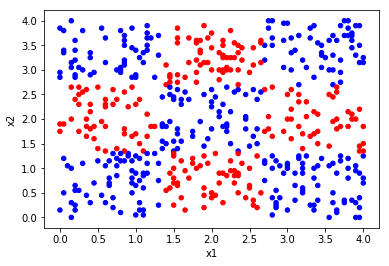

In [20]:
# load the date and visualize
df = pd.read_csv('input3.csv', header=0, names=['x1', 'x2', 'value'], sep=',', error_bad_lines=False)
df['color'] = np.where(df['value'] == 1, 'blue', 'red')
ax = df.plot(kind='scatter', x='x1', y='x2', color=df['color'])

In [21]:
# play aroud with iris dataset
iris = datasets.load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

[[-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]]
[[-3. -3. -3. -3. -3. -3. -3.]
 [-2. -2. -2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.  3.  3.]]
[[  1.96412803e-02   2.39279779e-01   1.07237757e+00   1.76805171e+00
    1.07237757e+00   2.39279779e-01   1.96412803e-02]
 [  2.39279779e-01   2.91502447e+00   1.30642333e+01   2.15392793e+01
    1.30642333e+01   2.91502447e+00   2.39279779e-01]
 [  1.07237757e+00   1.30642333e+01   5.85498315e+01   9.65323526e+01
    5.85498315e+01   1.30642333e+01   1.07237757e+00]
 [  1.76805171e+00   2.15392793e+01   9.65323526e+01   1.59154943e+02
    9.65323526e+01   2.15392793e+01   1.76805171e+00]
 [  1.07237757e+00   1.30642333e+01   5.85498315e+01   9.65323526e+0

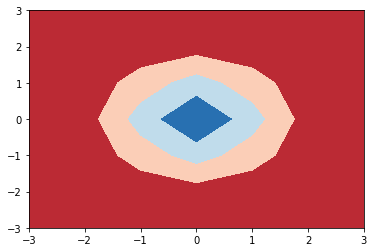

In [82]:
# try plotting contours (stolen, https://matplotlib.org/examples/pylab_examples/contourf_demo.html)
origin = 'lower'
#origin = 'upper'

delta = 1

x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
Z1 = plt.mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
#Z2 = plt.mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
#Z = 10000 * (Z1 - Z2)

Z = np.ma.array(Z1 * 1000)
print(X)
print(Y)
print(Z)
# mask a circle in the middle:
#interior = np.sqrt((X**2) + (Y**2)) < 0.5
#Z[interior] = np.ma.masked

# We are using automatic selection of contour levels;
# this is usually not such a good idea, because they don't
# occur on nice boundaries, but we do it here for purposes
# of illustration.
CS = plt.contourf(X, Y, Z, 4,
                  cmap='RdBu',
                  origin=origin)


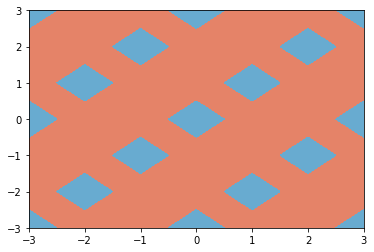

In [91]:
# try and make our own contour plot
origin = 'lower'
delta = 1

def checkerboard(x, y):
    mod = 3
    if (x % 3) == (y % 3):
        return 1
    else:
        return 0

def checkerboard2(x, y):
    if (y % 2 == 0):
        return 1
    
    return 0

x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
Z = np.zeros((len(X), len(X[0])))

# create our own "faux" function
for x in range(len(X)):
    for y in range(len(X[x])):
        Z[x][y] = checkerboard(x, y)

CS = plt.contourf(X, Y, Z, 1,
                  cmap='RdBu',
                  origin=origin)